In [2]:
import pm4py

In [3]:
log = pm4py.read_xes("3_modified.xes")
log

d:\Programs\Programming\Python\lib\site-packages\pm4py\util\dt_parsing\parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

,concept:name,time:timestamp,ManagedThreadId,NativeThreadId,QpcStamp,case:concept:name,concept:instance,lifecycle:transition
0,Procfiler/MethodStart_{Microsoft.CodeAnalysis....,2025-01-10 20:01:47.093946+00:00,25452,25452,13371926562902,1,NaN,NaN
1,GC/SampledObjectAllocation_{System.String},2025-01-10 20:01:47.094202+00:00,25452,25452,13371926565460,1,NaN,NaN
2,Procfiler/MethodStart_{Interop+Advapi32.EventA...,2025-01-10 20:01:47.094207+00:00,25452,25452,13371926565514,1,NaN,NaN
3,Procfiler/MethodEnd_{Interop+Advapi32.EventAct...,2025-01-10 20:01:47.094208+00:00,25452,25452,13371926565518,1,NaN,NaN
4,GC/SampledObjectAllocation_{ActivityInfo},2025-01-10 20:01:47.094209+00:00,25452,25452,13371926565530,1,NaN,NaN
...,...,...,...,...,...,...,...,...
2341769,Method/LoadVerbose_{Microsoft.CodeAnalysis.Com...,2025-01-10 20:03:37.599570+00:00,-1,18968,13373031606221,12,MethodLoadUnload_Microsoft.CodeAnalysis.Comman...,start
2341770,Procfiler/MethodStart_{Microsoft.CodeAnalysis....,2025-01-10 20:03:37.599576+00:00,18968,18968,13373031606272,12,NaN,NaN
2341771,Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Co...,2025-01-10 20:03:37.599580+00:00,18968,18968,13373031606318,12,NaN,NaN
2341772,Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CS...,2025-01-10 20:03:37.599580+00:00,18968,18968,13373031606321,12,NaN,NaN


In [ ]:
heuristic_net = pm4py.discover_heuristics_net(
    log.copy(),
    min_act_count = 5000,
    min_dfg_occurrences = 2000
)

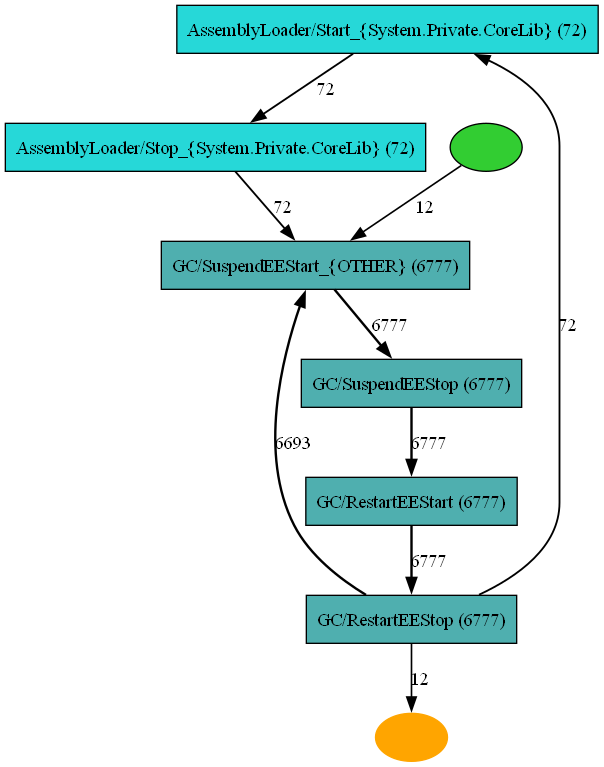

In [20]:
pm4py.view_heuristics_net(heuristic_net)

In [5]:
import tqdm

log_list = []
for event in tqdm.tqdm(list(log['concept:name'])):
    log_list.append(event.split('/')[0])

100%|██████████| 2341774/2341774 [00:00<00:00, 3532729.73it/s]


In [ ]:
import pandas

(pandas.Series(log_list).value_counts(normalize = True) * 100).to_excel('2__graph.xlsx')

In [32]:
log.groupby(by = "case:concept:name")["time:timestamp"].count().sort_values()

case:concept:name
12    138857
6     148603
11    151257
1     158377
5     159538
7     166562
8     166562
9     183170
10    197125
3     208682
2     230152
4     432889
Name: time:timestamp, dtype: int64

In [33]:
def extract_trace(event_log: pandas.DataFrame, trace_id):
    trace_log = event_log[event_log["case:concept:name"] == '7']
    trace_log.drop(columns = [ "case:concept:name" ])
    return trace_log

extract_trace(log, '7').equals(extract_trace(log, '8'))

True

In [34]:
is_procfiler = log["concept:name"].str.startswith("Procfiler/")
is_trace_8 = (log["case:concept:name"] == '8')

log_procfiler = log[is_procfiler & ~is_trace_8]
log_procfiler

,concept:name,time:timestamp,ManagedThreadId,NativeThreadId,QpcStamp,case:concept:name,concept:instance,lifecycle:transition
0,Procfiler/MethodStart_{Microsoft.CodeAnalysis....,2025-01-10 20:01:47.093946+00:00,25452,25452,13371926562902,1,NaN,NaN
2,Procfiler/MethodStart_{Interop+Advapi32.EventA...,2025-01-10 20:01:47.094207+00:00,25452,25452,13371926565514,1,NaN,NaN
3,Procfiler/MethodEnd_{Interop+Advapi32.EventAct...,2025-01-10 20:01:47.094208+00:00,25452,25452,13371926565518,1,NaN,NaN
7,Procfiler/MethodStart_{Interop+Advapi32.EventA...,2025-01-10 20:01:47.094226+00:00,25452,25452,13371926565700,1,NaN,NaN
8,Procfiler/MethodEnd_{Interop+Advapi32.EventAct...,2025-01-10 20:01:47.094226+00:00,25452,25452,13371926565701,1,NaN,NaN
...,...,...,...,...,...,...,...,...
2341767,Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Co...,2025-01-10 20:03:37.599533+00:00,18968,18968,13373031605845,12,NaN,NaN
2341770,Procfiler/MethodStart_{Microsoft.CodeAnalysis....,2025-01-10 20:03:37.599576+00:00,18968,18968,13373031606272,12,NaN,NaN
2341771,Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Co...,2025-01-10 20:03:37.599580+00:00,18968,18968,13373031606318,12,NaN,NaN
2341772,Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CS...,2025-01-10 20:03:37.599580+00:00,18968,18968,13373031606321,12,NaN,NaN


In [35]:
pm4py.write_xes(log_procfiler, "only_procfiler.xes")

exporting log, completed traces ::   0%|          | 0/11 [00:00<?, ?it/s]